# Data

In [ ]:
import pandas as pd

url = (
    "https://raw.githubusercontent.com/"
    "neoyipeng2018/acct725_teachingmaterials/main/tiktok_data.csv"
)

df = pd.read_csv(url)

texts = df.text.tolist()

In [ ]:
df.shape

(129, 6)

# Traditional Sentiment

## VADER

In [ ]:
!pip install vaderSentiment --quiet

In [ ]:
df.head(2)

,post_id,create_time,is_top,post_content,comments,text
0,7455063785066237215,1735767313,-1,Dollar tree beauty finds #dollartreefinds #dol...,commenting to stay on dollar tree tok\n\nHave ...,Post Title: Dollar tree beauty finds #dollartr...
1,7455094544628043054,1735774468,-1,#ad Discount tire ain’t getting my money😤😤 #st...,get a tire at walmart. if you get the warranty...,Post Title: #ad Discount tire ain’t getting my...


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# 1. Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# 2. Define a function to get compound sentiment score
def get_vader_sentiment(text):
    if isinstance(text, str):  # ensure it's a string
        return analyzer.polarity_scores(text)['compound']
    else:
        return None  # handle missing/non-string values

# 3. Apply sentiment analysis to each column
for col in ['post_content', 'comments', 'text']:
    df[f'{col}_sentiment'] = df[col].apply(get_vader_sentiment)

In [ ]:
df.head(2)

,post_id,create_time,is_top,post_content,comments,text,post_content_sentiment,comments_sentiment,text_sentiment
0,7455063785066237215,1735767313,-1,Dollar tree beauty finds #dollartreefinds #dol...,commenting to stay on dollar tree tok\n\nHave ...,Post Title: Dollar tree beauty finds #dollartr...,0.8225,0.9858,0.9908
1,7455094544628043054,1735774468,-1,#ad Discount tire ain’t getting my money😤😤 #st...,get a tire at walmart. if you get the warranty...,Post Title: #ad Discount tire ain’t getting my...,0.0000,0.2960,0.2960


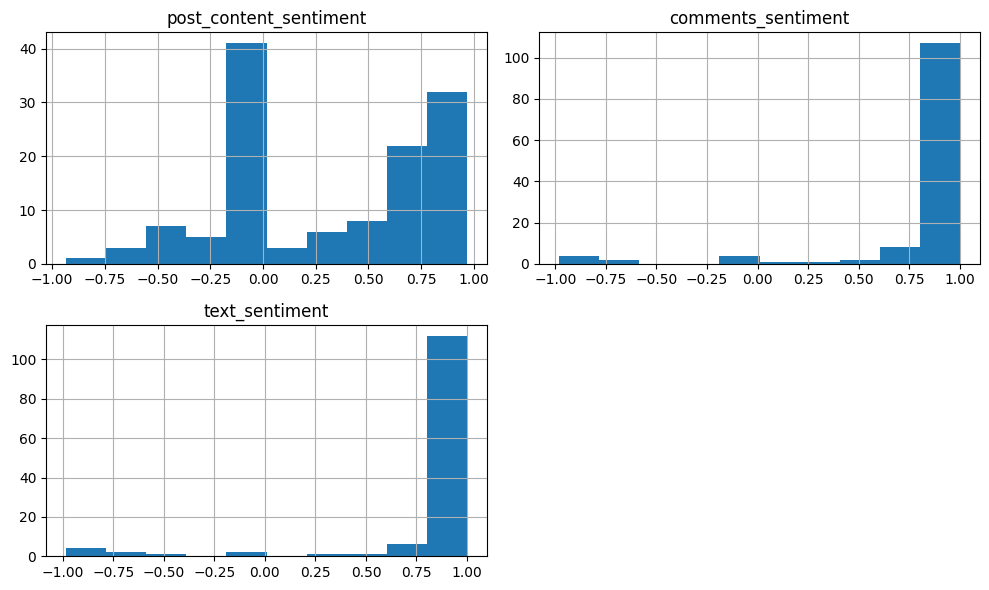

In [ ]:
import matplotlib.pyplot as plt

df[['post_content_sentiment', 'comments_sentiment', 'text_sentiment']].hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

In [ ]:
df[df['post_content_sentiment']<-0.5]

,post_id,create_time,is_top,post_content,comments,text,post_content_sentiment,comments_sentiment,text_sentiment
24,7458046080035589422,1736461677,-1,What’s the deal with this purse?! 😭👛#shopping ...,"As someone who worked in retail forever ago, t...",Post Title: What’s the deal with this purse?! ...,-0.5255,0.9722,0.9708
33,7460173387642506538,1736956981,-1,Ofertas en Walmart! 😱 #pvroofer #carnalito #ca...,jbl\n\nsi pero esas se descargan rapidas con e...,Post Title: Ofertas en Walmart! 😱 #pvroofer #c...,-0.7263,-0.5883,-0.8723
39,7461012926057467167,1737152453,0,blowout hair tutorial at home!!!! i suddenly h...,you just solddddd me on the briogeo\n\nlove th...,Post Title: blowout hair tutorial at home!!!! ...,-0.6506,0.9733,0.9856
40,7461299686842961198,1737219214,0,Is the NEW matte foundation from @Dollar Tree ...,Omg i'd dieee for you to try the UK Home Barga...,Post Title: Is the NEW matte foundation from @...,-0.5093,0.9997,0.9997
41,7461776309912653102,1737330194,-1,This was such a good trip! 😱😱😱 Not to mention ...,Whoa was that natures valley $1.25😳\n\nHoney b...,Post Title: This was such a good trip! 😱😱😱 Not...,-0.9335,0.9452,0.0000
91,7475976494636928302,1740636483,-1,Why are my hunts always a failll 😭😩 #dollartre...,you need a mini mic😭\n\nGo to dollar tree\n\nI...,Post Title: Why are my hunts always a failll 😭...,-0.6369,-0.0586,-0.4267
112,7485859139982298414,1742937432,-1,Topps Laying Eggs And they COOK! Lame Title ri...,The end was funny ash\n\nhaha I just love your...,Post Title: Topps Laying Eggs And they COOK! L...,-0.5242,0.9595,0.9576


In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
df[df['post_content_sentiment']<-0.5]

,post_id,create_time,is_top,post_content,comments,text,post_content_sentiment,comments_sentiment,text_sentiment
24,7458046080035589422,1736461677,-1,What’s the deal with this purse?! 😭👛#shopping #target #targetfinds #targethaul #haul #minivlog #Lifestyle #planner #errandsvlog,"As someone who worked in retail forever ago, there are usually release dates for items and you’re not allowed to ring it up before the date you’re supposed to put on sales floor.\n\nI’d pull the tag from another purse in a different color & tell them it didn’t have a tag but this one does 😅 they’ll just scan it and call it a day … don’t tell them I told you\n\nThis happened to me but with a toy lol like really why put it out then😭makes noo sense\n\nMy target is so nice they would just say do you want to buy it for $4 and would sell it as a random thing\n\nThe rain was a paid actor\n\nGirl i would've pulled a Marlene for that purse 😭😭It's beautiful😍💖🎀\n\nProbably a recall or they put it on the shelf before the release date happens a lot\n\nWhat about self check out?","Post Title: What’s the deal with this purse?! 😭👛#shopping #target #targetfinds #targethaul #haul #minivlog #Lifestyle #planner #errandsvlog \n\nPost Comments:\nAs someone who worked in retail forever ago, there are usually release dates for items and you’re not allowed to ring it up before the date you’re supposed to put on sales floor.\n\nI’d pull the tag from another purse in a different color & tell them it didn’t have a tag but this one does 😅 they’ll just scan it and call it a day … don’t tell them I told you\n\nThis happened to me but with a toy lol like really why put it out then😭makes noo sense\n\nMy target is so nice they would just say do you want to buy it for $4 and would sell it as a random thing\n\nThe rain was a paid actor\n\nGirl i would've pulled a Marlene for that purse 😭😭It's beautiful😍💖🎀\n\nProbably a recall or they put it on the shelf before the release date happens a lot\n\nWhat about self check out?",-0.5255,0.9722,0.9708
33,7460173387642506538,1736956981,-1,Ofertas en Walmart! 😱 #pvroofer #carnalito #carnalitooficial #ofertas #deals @Walmart,"jbl\n\nsi pero esas se descargan rapidas con el sol la jbl 4 aguantan hasta 5 horas👍👍👍\n\nla de 1000\n\nLo barato sale caro por más baratas que estén JBL suena mucho mejor no se distorsiona yo tengo una JBL y se escucha súper bien y las baratas se escuchan horrible ..!!\n\nEn qe tienda está mano\n\nSinceramente aunque no sea jbl se ven bien\n\nson mejores las harman kardon\n\npero lo importante k la gbl no ocupa mucho espacio ya k es pequeña y de muy buena calidad saludos\n\nAhí me mandas una carnalito 😁\n\nEsa compré en el wualmart a 128$\n\nY son buenas\n\ntodos sabemos que la jbl es la mejor para que andamos buscando otra que después de un tiempo lla no jalan\n\nPero la marca\n\nyo compré la flip 6 y la verdad no me gustó lendura muy poco l batería está mejor la 5\n\naver si me regalas aun que sea uno de esos carnalito\n\ncada quien el que no puede que compre lo que el dise pero la jbl es una chingoneria nada q ver consola q dise\n\nregalame una carnalito\n\nEsa es la marca de Walmart Onn y suena machin por el precio .\n\nNada q ver una cn la otra el precio si se refleja pero n n es ni casi iwal\n\ncanalizó regalarme una.\nocupo para ensayar soy músico y lo necesito porfavor 🥺\n\nCarnalito yo compré la jbl extreme 2 en Black Friday tan solo 160 dólares su costo normal es de 300 como ves.\n\nYo tengo la onn de $120 y la verdad no le pide nada ala jbl tiene buenos bajos y buena calidad de sonido\n\nEn cual Walmart es bro ? Dame la ubicación para ir por una oferta\n\npero no sé comparan cómo la jbl\n\nhase cuatro meses pague 90 dolares por esa y si la recomiendo muy buena\n\nxq jbl es jbl y eso nadie lo va cambiar y si hablamos de calidad jbl buenísima 👌 marca\n\nharman kardon lo mejor\n\nObviamente estan un poco mas económicas que la Jbl, pero la Jbl es Jbl... Es de excelente calidad 👌\n\nEl que no conoce a dios al cualquier san

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer, SentiText
from vaderSentiment.vaderSentiment import BOOSTER_DICT, C_INCR, normalize, scalar_inc_dec
import math

In [ ]:
def explain_sentiment_scoring(text):
    """
    Breaks down the VADER sentiment analysis process to show what drives the scoring.

    Args:
        text (str): The text to analyze

    Returns:
        dict: A detailed breakdown of the sentiment analysis process
    """
    analyzer = SentimentIntensityAnalyzer()

    # Store the original scores for comparison
    final_scores = analyzer.polarity_scores(text)

    # Initialize the breakdown dictionary
    breakdown = {
        "text": text,
        "final_scores": final_scores,
        "components": {
            "lexicon_valences": {},
            "capitalization_impact": {},
            "booster_impact": {},
            "negation_impact": {},
            "idioms_impact": {},
            "but_clause_impact": None,
            "punctuation_impact": {
                "exclamation": 0,
                "question": 0
            }
        },
        "word_scores": []
    }

    # Process the text as VADER does
    # 1. Convert emojis to text
    text_no_emoji = ""
    prev_space = True
    for chr in text:
        if chr in analyzer.emojis:
            description = analyzer.emojis[chr]
            if not prev_space:
                text_no_emoji += ' '
            text_no_emoji += description
            prev_space = False
        else:
            text_no_emoji += chr
            prev_space = chr == ' '
    processed_text = text_no_emoji.strip()

    # 2. Tokenize
    sentitext = SentiText(processed_text)
    words_and_emoticons = sentitext.words_and_emoticons
    is_cap_diff = sentitext.is_cap_diff

    # Track sentiment scores for each word
    sentiments = []

    # 3. Process each word
    for i, item in enumerate(words_and_emoticons):
        valence = 0
        item_lowercase = item.lower()

        # Skip booster words and special cases
        if item_lowercase in BOOSTER_DICT or (i < len(words_and_emoticons) - 1 and
                                             item_lowercase == "kind" and
                                             words_and_emoticons[i + 1].lower() == "of"):
            sentiments.append(valence)
            breakdown["word_scores"].append({
                "word": item,
                "valence": valence,
                "note": "Booster word or special case"
            })
            continue

        # Check if word is in lexicon
        if item_lowercase in analyzer.lexicon:
            valence = analyzer.lexicon[item_lowercase]
            breakdown["components"]["lexicon_valences"][item] = valence

            # Check for capitalization impact
            original_valence = valence
            if item.isupper() and is_cap_diff:
                if valence > 0:
                    valence += C_INCR
                else:
                    valence -= C_INCR
                breakdown["components"]["capitalization_impact"][item] = valence - original_valence

            # Check for boosters
            for start_i in range(0, 3):
                if i > start_i and words_and_emoticons[i - (start_i + 1)].lower() not in analyzer.lexicon:
                    booster_word = words_and_emoticons[i - (start_i + 1)]
                    original_valence = valence
                    s = scalar_inc_dec(booster_word, valence, is_cap_diff)
                    if start_i == 1 and s != 0:
                        s = s * 0.95
                    if start_i == 2 and s != 0:
                        s = s * 0.9
                    valence = valence + s

                    if s != 0:
                        breakdown["components"]["booster_impact"][booster_word] = {
                            "target_word": item,
                            "impact": s,
                            "distance": start_i + 1
                        }

                    # Check for negation
                    original_valence = valence
                    valence = analyzer._negation_check(valence, words_and_emoticons, start_i, i)
                    if valence != original_valence:
                        breakdown["components"]["negation_impact"][item] = valence - original_valence

                    # Check for special idioms
                    if start_i == 2:
                        original_valence = valence
                        valence = analyzer._special_idioms_check(valence, words_and_emoticons, i)
                        if valence != original_valence:
                            breakdown["components"]["idioms_impact"][item] = valence - original_valence

        sentiments.append(valence)
        breakdown["word_scores"].append({
            "word": item,
            "valence": valence
        })

    # 4. Check for "but" clauses
    original_sentiments = sentiments.copy()
    sentiments = analyzer._but_check(words_and_emoticons, sentiments)
    if sentiments != original_sentiments:
        breakdown["components"]["but_clause_impact"] = {
            "before": original_sentiments,
            "after": sentiments
        }

    # 5. Check for punctuation emphasis
    ep_amplifier = analyzer._amplify_ep(text)
    qm_amplifier = analyzer._amplify_qm(text)
    breakdown["components"]["punctuation_impact"]["exclamation"] = ep_amplifier
    breakdown["components"]["punctuation_impact"]["question"] = qm_amplifier

    # 6. Calculate final scores
    if sentiments:
        sum_s = float(sum(sentiments))
        punct_emph_amplifier = ep_amplifier + qm_amplifier

        # Add emphasis from punctuation
        if sum_s > 0:
            sum_s += punct_emph_amplifier
        elif sum_s < 0:
            sum_s -= punct_emph_amplifier

        # Calculate compound score
        compound = normalize(sum_s)

        # Calculate positive, negative, and neutral proportions
        pos_sum, neg_sum, neu_count = analyzer._sift_sentiment_scores(sentiments)

        if pos_sum > math.fabs(neg_sum):
            pos_sum += punct_emph_amplifier
        elif pos_sum < math.fabs(neg_sum):
            neg_sum -= punct_emph_amplifier

        total = pos_sum + math.fabs(neg_sum) + neu_count
        pos = math.fabs(pos_sum / total)
        neg = math.fabs(neg_sum / total)
        neu = math.fabs(neu_count / total)

        breakdown["calculation"] = {
            "sum_of_sentiments": sum(sentiments),
            "punctuation_emphasis": punct_emph_amplifier,
            "adjusted_sum": sum_s,
            "compound_normalization": compound,
            "pos_sum": pos_sum,
            "neg_sum": neg_sum,
            "neu_count": neu_count,
            "total": total,
            "pos_proportion": pos,
            "neg_proportion": neg,
            "neu_proportion": neu
        }

    return breakdown

- lexicon_valences: The base sentiment values for each word found in the lexicon vaderSentiment.py:282-284

- capitalization_impact: How much ALL CAPS words affected the sentiment vaderSentiment.py:295-300

- booster_impact: How intensifiers and dampeners (like "very" or "kind of") modified the sentiment vaderSentiment.py:306-312

- negation_impact: How negation words (like "not" or "never") affected the sentiment vaderSentiment.py:313

- idioms_impact: How special idioms were handled vaderSentiment.py:315

- but_clause_impact: How "but" clauses modified sentiment (reducing weight before "but", increasing after) vaderSentiment.py:332-346

- punctuation_impact: How exclamation points and question marks amplified sentiment vaderSentiment.py:436-445 vaderSentiment.py:447-459

- word_scores: The final sentiment score for each word after all adjustments

- calculation: The mathematical steps to arrive at the final compound, positive, negative, and neutral scores vaderSentiment.py:462-474 vaderSentiment.py:486 vaderSentiment.py:495-498



In [ ]:
text = "This was such a good trip! 😱😱😱 Not to mention the TheraBreath! 🤌🏽 @Dollar Tree #shopwithme #fyp #dollartree #asmr #dollartreefinds #dollartreehaul #dollartreebeauty #dollartreeshopping #shopwithmeatdollartree #dollartreemakeup"
explain_sentiment_scoring(text)


{'text': 'This was such a good trip! 😱😱😱 Not to mention the TheraBreath! 🤌🏽 @Dollar Tree #shopwithme #fyp #dollartree #asmr #dollartreefinds #dollartreehaul #dollartreebeauty #dollartreeshopping #shopwithmeatdollartree #dollartreemakeup',
 'final_scores': {'neg': 0.34,
  'neu': 0.605,
  'pos': 0.055,
  'compound': -0.9335},
 'components': {'lexicon_valences': {'good': 1.9,
   'screaming': -1.6,
   'fear': -2.2},
  'capitalization_impact': {},
  'booster_impact': {},
  'negation_impact': {},
  'idioms_impact': {},
  'but_clause_impact': None,
  'punctuation_impact': {'exclamation': 0.584, 'question': 0}},
 'word_scores': [{'word': 'This', 'valence': 0},
  {'word': 'was', 'valence': 0},
  {'word': 'such', 'valence': 0},
  {'word': 'a', 'valence': 0},
  {'word': 'good', 'valence': 1.9},
  {'word': 'trip', 'valence': 0},
  {'word': 'face', 'valence': 0},
  {'word': 'screaming', 'valence': -1.6},
  {'word': 'in', 'valence': 0},
  {'word': 'fear', 'valence': -2.2},
  {'word': 'face', 'valenc

In [ ]:
score = -10.084
alpha=15

In [ ]:
score / math.sqrt((score * score) + alpha)

-0.933515418929888

## In Class Exercise (15mins)

Compare the post VADER sentiment against LM Dictionary and analyse where it is different


# Named Entity Recognition

## GliNER

In [ ]:
!pip install gliner --quiet
!pip show gliner #0.2.17

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 111.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 10.3 MB/s eta 0:00:00
Name: gliner
Version: 0.2.20
Summary: Generalist model for NER (Extract any entity types from texts)
Home-page: https://github.com/urchade/GLiNER
Author: Urchade Zaratiana, Nadi Tomeh, Pierre Holat, Thierry Charnois
Author-email: 
License: Apache-2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: huggingface_hub, onnxruntime, sentencepiece, torch, tqdm, transformers
Required-by: 


In [ ]:
from gliner import GLiNER

# Initialize GLiNER with the base model
model = GLiNER.from_pretrained("gliner-community/gliner_small-v2.5") #gliner-community/gliner_small-v2.5 #knowledgator/modern-gliner-bi-base-v1.0

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 10 files:   0%|          | 0/10 [00:00<?, ?it/s]

README.md:   0%|          | 0.00/23.3k [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

gliner_config.json:   0%|          | 0.00/676 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/970 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/664M [00:00<?, ?B/s]

models_comparison.png:   0%|          | 0.00/156k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/8.65M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.63k [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/1.52k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/578 [00:00<?, ?B/s]

In [ ]:
def merge_entities(entities, text):
    if not entities:
        return []
    merged = []
    current = entities[0]
    for next_entity in entities[1:]:
        if next_entity['label'] == current['label'] and (next_entity['start'] == current['end'] + 1 or next_entity['start'] == current['end']):
            current['text'] = text[current['start']: next_entity['end']].strip()
            current['end'] = next_entity['end']
        else:
            merged.append(current)
            current = next_entity
    # Append the last entity
    merged.append(current)
    return merged

def get_ents(row):
    try:
        text = row.text
        labels = ["company", "business", "corporation", "enterprise", "service", "brand", "label", "trademark"]
        entities = model.predict_entities(text, labels, threshold=0.9)
        entities = merge_entities(entities, text)
        text_entity = list(set([x['text'] for x in entities]))

        return {'companies': text_entity}
    except: return {'companies':[]}

In [ ]:
%%time
df['entities'] = df.apply(get_ents, axis=1)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
/usr/local/lib/python3.11/dist-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 772 has been truncated to 768
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")


CPU times: user 3min 11s, sys: 8.15 s, total: 3min 19s
Wall time: 33.7 s


In [ ]:
df['entities'] = df['entities'].apply(lambda x: x['companies'])

In [ ]:
df['entities'].sample(3).T

,entities
64,[]
92,[]
39,[Briogeo]


In [ ]:
df = df.explode('entities').rename(columns={'entities': 'entity'})

In [ ]:
df.shape

(163, 10)

In [ ]:
df.tail().T

,124,125,126,127,128
post_id,7487333558047198510,7487370426612550958,7487429970667818286,7487693700437495083,7487771706115837214
create_time,1743280726,1743289307,1743303175,1743364580,1743382732
is_top,-1,-1,-1,-1,-1
post_content,I love her #xyzbcafypシ #fypシ #foryoupage #explore #bozeman #target #deals #explorepage #spring,I GOT IT BITCHESSSS🤪 #dollartree #dollartreefinds #dupe #fyp #deals #dealsforyoudays #save #savemoney @Dollar Tree,Experimenting 🙃 (first world problems I know lol) #walmartdelivery #shopping #shopwithme #walmart #walmartfinds #birthdaygift #jessicajordan44,Finished up my grocery trip with a Walmart Haul! 👏🏻 #shopwithme #asmrsounds #asmr #groceryhaul #walmart,Dollar Tree 🌳 Reviews 💚 @Dollar Tree #dollartree #dollartreefinds #dollartreeskincare #dollartreecommmunity #dollartreebesties #dollartreesisters #dollartreejunkie #skincare #skincareproducts #skinfluencer #skincarelover #healthyskin #loveyourskin #microinfluencer #creatorsearchinsights #contentcreator #fyp #foryoupage #selflove #SelfCare #thegirlinthepinkwrap #thegirlinthecloset #thegirlinthepeterbilt #bargainshopper #ilovepink #dollartreereview #dollartreereviews #review #reviews #reviewtok #reviewtoks #tiktokreviews #tiktokreview #reviewsoftiktok #skincarereview #skincarereviews #productreview #productreviews #louisianagirl #livingmybestlife #thiittlelifeofmine
comments,i can’t find them online!\n\nOmg there is a yellow one now\n\ni can’t find them online anywhere!\n\nI got the frog🤭\n\nWill they be online??\n\nmy target doesn’t have them yet 😭\n\ni need to see the item number on the tag of these omggggg so cute 😭\n\nme and my sister each got one today😜\n\ni need all of them\n\ni need\n\nMy Dino is the best thing to ever happen to me🥰\n\nmy target hasn’t put these out yet 😭 we just got the farm animals\n\nomg! I ran to target. Jackpot!!!!\n\ni love weighted plushies but i wish they were HEAVIER\n\nI already have the frog but he told me he’s lonely 😂\n\nI don’t need them I don’t need them I don’t need them\n\n@kinsss\n\n@haylie ‼️\n\n@AVA LOUISE\n\n@lili\n\n@Ry26\n\n@😻Lily😻\n\n@AUD 💌\n\n@k\n\n@ellagraacee\n\n@Aubrey\n\n@Bianca💋🐆💌 we must go…\n\n@zoe\n\n@Linds ‼️‼️,I’ve been searching for months at the 2 in my town. Went to both today and found one box up by the cashier and got 3! I was so excited!\n\nOh what a beautiful sight! 😍😍😍,"Yess they don’t like looking it’s sooo annoying im constantly having problems they don’t work\n\nIt’s possible that they were at a different Walmart.\n\nI’d call for sure and talk to a manager\n\nokay and if you did express order it was the delivery driver who shopped it... if you didnt order it express then walmart employees shop it\n\nThis happens to me all the time so when it does I go and if I find more than half of what they said was out of stock I take part of the tip away\n\nThis happens to me every single time I add something that is a non food item. Like slippers. I tried twice to order slippers and they kept canceling just those. But they had them. 🤨\n\nMost orders are picked way ahead of time so it could be that it was out of stock at the time they shopped your order\n\nI did Walmart pickup and they said my item was out of stock. I packed and went in and they had it.\n\nAbsolutely and every time it’s the 5 things I actually need to order 😩\n\nsomeone once told me that if there's only 1 left on the shelf that delivery and curbside and whatever pickers aren't allowed to grab it for an online order. but idk\n\nI work at aldi and we stock the shelves at different times of day.....so it may be that at the time they were shopping it wasn't on the shelf but stocked later...it doesn't mean the worker is lazy\n\nSometimes the item can’t be scanned in when they do the order\n\nI can do walmart delivery for groceries but nothing else.\n\nThey do it to people all the time..They lazy to look.I'm in Ontario too\n\nI had a Walmart employee once tell me that have a certain amount of items for in store shopping and online shoppi

In [ ]:
df = df[df.entity.notnull()]

In [ ]:
df = df[df['entity'].str.match(r'^[A-Z]')]

In [ ]:
df.entity.unique()

array(['Kia', 'Planet Fitness', 'Sam’s Club', 'Walmart', 'Nutella',
       'Target', 'Hermès', 'Dollar Tree', 'Catalina Crunch',
       'Outshine Snacks', 'Catalina crunch', 'Sun chip', 'Pedialyte',
       'ASMR Shopping', 'James Avery', 'Briogeo', 'Dior', 'Walgreens',
       'SAGAJEWELS', 'Pillsbury', 'Alani', 'Alani Nutrition', 'Dyson',
       'Shark', 'Samsung', 'Dove', 'Lynwood', 'Benefit',
       'ColourPop Cosmetics', 'I Dew Care', 'Drink Poppi', 'Chex', 'WIC',
       'H&M', 'NinjaCreami', 'Poppi', 'Eelry Jewelry', 'Hobby lobby',
       'Parker', 'Topps', 'L’Oréal Paris'], dtype=object)

## Compare GliNER vs. Traditional NER (SpaCy) - 15mins

Extract the following using GliNER
- Standard entities (ORG, PERSON, DATE, LOCATION)
- Social media constructs (hashtags, emojis, slang)

In [ ]:
post = 'Post Title: haul time!! #fyp #relate #relatable #haul #foryou #xyzbca #ulta #ultahaul #tryon #tryonhaul #hugehaul #shopping #shoppinghaul #makeup #makeuphaul #clothinghaul #mallhaul #hugemallhaul #hugeclothinghaul #richhaul #sephora #sephorahaul #hugesephorahaul #brandy #brandymelville #brandymelvilletryon #brandytryon #brandytryonhaul #brandymelvilletryonhaul #brandybasics #brandymelvillebasics #tjmaxx #tjmaxxhaul #hugetjmaxxhaul #tjmaxxfinds #target #targethaul #targetfinds #targetmusthaves #hugetargethaul #hourglass #hourglasscosmetics #hourglassconcealer #hourglasscosmeticsconcealer #cosrx #cosrxsnailessence #cosrxsnailmucin #snailmucin #toofaced #toofacedcosmetics #toofacedmakeup #toofacedmascara #toofacedwaterproofmascara #urbandecay #urbandecaysettingspray #urbandecayallnighter @ava rae \n\nPost Comments:\nthey sell charlotte tilbury at sephora!!\n\nLove it\n\nur so pretty!\n\n❤️❤️❤️\n\n❤️❤️❤️\n\nHi pretty! I’m lula from SAGAJEWELS marketing team. We\'re excited to potentially collaborate with you! 💙 Send "lula" to our Instagram IG:SAGAJEWELS.OFFICIAL🗨\n\nPls moots? I’m new and rlly wanna grow and get 1k followers!! I follow everyone back!💕💕 let’s help each other out! I’m trying to get to 1k mooties by April!! Let’s help each other out 💕💕🥰\n\nNot me being midsize and been shopping at brandy since 2020 and still fit comfortably. Not everything looks good on me but a good amount does. I wasn’t always midsize i used to be really tiny we have'

# Topic Modelling

## Topic Modelling with LDA

In [ ]:
comments = df.comments.fillna('').tolist()

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Convert to Bag-of-Words
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(comments)

lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda.fit(X)

# Display topics
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-5:]])


Topic 0:
['wic', 'like', 'need', 'la', 'love']
Topic 1:
['love', 'good', 'target', 'dollar', 'tree']


## Find out what is the 'best' k to choose (5mins)

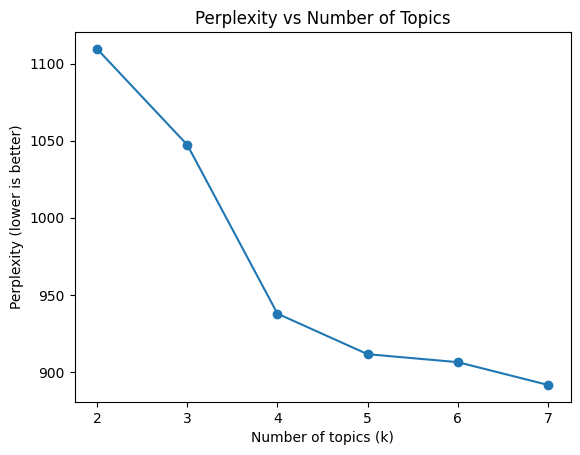

In [ ]:
perplexities = []
ks = range(2, 8)
for k in ks:
    lda = LatentDirichletAllocation(n_components=k, random_state=42)
    lda.fit(X)
    perplexities.append(lda.perplexity(X))

import matplotlib.pyplot as plt
plt.plot(ks, perplexities, marker='o')
plt.xlabel("Number of topics (k)")
plt.ylabel("Perplexity (lower is better)")
plt.title("Perplexity vs Number of Topics")
plt.show()


## Topic Modelling with BerTopic

In [ ]:
!pip install bertopic --quiet
!pip show bertopic #0.17.0

Name: bertopic
Version: 0.17.0
Summary: BERTopic performs topic Modeling with state-of-the-art transformer models.
Home-page: https://github.com/MaartenGr/BERTopic
Author: 
Author-email: "Maarten P. Grootendorst" <maartengrootendorst@gmail.com>
License: MIT License

Copyright (c) 2024, Maarten P. Grootendorst

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIE

In [ ]:
from bertopic import BERTopic

In [ ]:
%%time
topic_model = BERTopic()
topics, probs = topic_model.fit_transform(texts)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

CPU times: user 13.7 s, sys: 1.48 s, total: 15.2 s
Wall time: 21.4 s


In [ ]:
topic_model.get_topic_info()

Topic  Count                    Name  \
0     -1     52        -1_the_to_you_it   
1      0     23       0_you_the_to_your   
2      1     22  1_tree_dollar_the_post   
3      2     22    2_target_post_the_so   
4      3     10       3_the_to_your_you   

                                             Representation  \
0       [the, to, you, it, and, post, so, for, walmart, is]   
1          [you, the, to, your, it, is, for, and, so, love]   
2     [tree, dollar, the, post, love, to, my, it, you, and]   
3  [target, post, the, so, is, to, this, for, shopping, my]   
4           [the, to, your, you, is, do, so, in, new, what]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [ ]:
topic_model.get_topic(0)


[('you', 0.07532047973409317),
 ('the', 0.057787752443216135),
 ('to', 0.04754689492240596),
 ('your', 0.04243991109607442),
 ('it', 0.04122695774184231),
 ('is', 0.04013638594364894),
 ('for', 0.03983459940626191),
 ('and', 0.03683204801717842),
 ('so', 0.0343190394884718),
 ('love', 0.03386340441323113)]

In [ ]:
topic_model.get_document_info(texts)

Document  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Post Title: Dollar tree beauty finds #dollartreefinds #dollartree #dollartreehaul #dollartreebeauty #makeupfinds #beautyfinds #shopping #shopwithme #dollartreemakeup #makeup #beauty @Dollar Tree \n\nPost Comments:\ncommenting to stay on dollar tree tok\n\nHave you found the touch land hand sanitizer from dollar tree?\n\nOMMGGG I LOVE UR VIDEOSS LOVE U GIRLL UR SO PRETTYY😭💕\n\nHii\n\nI’m early😁😁😁😁 I also love your vids\n\nCommenting to stay on dollar tree toc\n\nYeah im going right now and I got it\n\nbro I guess my dollar tree is trash cuz they never have any of this   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

## In-class activity: Visualize the topics - do they make sense? (5mins)

# Financial Sentiment

## FinBERT

In [ ]:
!pip install transformers --quiet
!pip show transformers #4.51.3

Name: transformers
Version: 4.51.3
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /usr/local/lib/python3.11/dist-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: gliner, peft, sentence-transformers


In [ ]:
import torch
print(torch.cuda.is_available())  # Should return True if CUDA is available
print(torch.cuda.device_count())

True
1


In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="yiyanghkust/finbert-tone", device=0, truncation=True, max_length=512)

config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/439M [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
%%time
# Run the pipeline on the list
results = pipe(texts)

CPU times: user 1.87 s, sys: 399 ms, total: 2.27 s
Wall time: 1.74 s


In [ ]:
len(results)

129

In [ ]:
df_sentiment = pd.DataFrame({'text': texts,
              'sentiment': results})

In [ ]:
df_sentiment['finbert_sent'] = [x['label'] for x in results]
df_sentiment['finbert_proba'] = [x['score'] for x in results]

In [ ]:
df_sentiment.head(2)

,text,sentiment,finbert_sent,finbert_proba
0,Post Title: Dollar tree beauty finds #dollartreefinds #dollartree #dollartreehaul #dollartreebeauty #makeupfinds #beautyfinds #shopping #shopwithme #dollartreemakeup #makeup #beauty @Dollar Tree \n\nPost Comments:\ncommenting to stay on dollar tree tok\n\nHave you found the touch land hand sanitizer from dollar tree?\n\nOMMGGG I LOVE UR VIDEOSS LOVE U GIRLL UR SO PRETTYY😭💕\n\nHii\n\nI’m early😁😁😁😁 I also love your vids\n\nCommenting to stay on dollar tree toc\n\nYeah im going right now and I got it\n\nbro I guess my dollar tree is trash cuz they never have any of this,"{'label': 'Neutral', 'score': 0.9999570846557617}",Neutral,0.999957
1,Post Title: #ad Discount tire ain’t getting my money😤😤 #stangry #TikTokShop #jumpstarter #tireinflator #flashsale #carsoftiktok #carcommunity #musthave #newyearsale #viral #fyp \n\nPost Comments:\nget a tire at walmart. if you get the warranty it's like $20 and if you're tired gets a nail they'll fix it under warranty and then you only have to pay $20 again for a new warranty\n\nDiscount tire will repair your tire for free I work for one\n\nBuy a new tire for the Kia or new front runners for Stangry🤷🏻‍♂️\n\nGet that bread dawg🙏🙏🙏\n\nDiscount tire does air for free\n\nYou might have a loose bead take it to a tire shop or just anything to do with cars and have them reseat the tire I had the same problem and it’s fixed it\n\nits 20 dollars to patch the tire my brother 😭🙏\n\nTax right off\n\ni mean half the time the tire repair is free 😂\n\nhi parker\n\nBuddy I can sell you a tire for like $80 or so\n\nPlug it…,"{'label': 'Neutral', 'score': 0.9998683929443359}",Neutral,0.999868


In [ ]:
df = df.merge(df_sentiment,on='text').drop('sentiment',axis=1)

<Axes: >

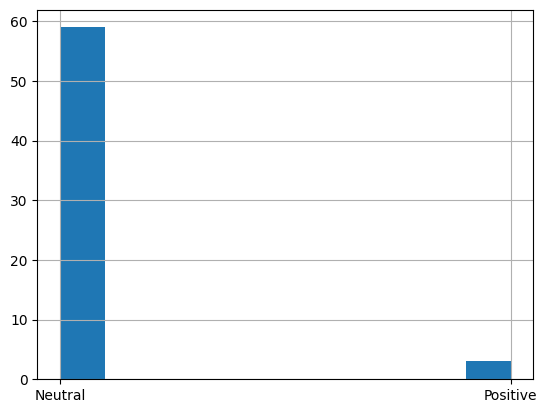

In [ ]:
df.finbert_sent.hist()

In [ ]:
# # Print results
# for text, result in zip(texts, results):
#     print(f"Text: {text}")
#     print(f"Label: {result['label']}, Score: {result['score']:.4f}")
#     print("---"*50)

In [ ]:
df.shape

(62, 12)

In [ ]:
df.to_csv('tiktok_lesson1.csv',index=False)
# df_sentiment.to_csv('tiktok_lesson1.csv',index=False)

## Compare FinEBRT with VADER for difference - which is  better? (15mins)

# Sentiment via SetFit
- Generate small dataset by prompting frontier model
- use SetFit to fine tune and train for sentiment

In [ ]:
!pip install -qU setfit
!pip show setfit # 1.1.2

Name: setfit
Version: 1.1.2
Summary: Efficient few-shot learning with Sentence Transformers
Home-page: https://github.com/huggingface/setfit
Author: 
Author-email: 
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: datasets, evaluate, huggingface_hub, packaging, scikit-learn, sentence-transformers, transformers
Required-by: 


In [ ]:
from datasets import Dataset
from setfit import SetFitModel, Trainer, TrainingArguments

# Create a small dataset with 10 examples per class
texts = [
    # Positive examples
    "I absolutely loved this product, it exceeded all my expectations!",
    "The service was excellent and the staff was very friendly.",
    "This is the best purchase I've made all year.",
    "The quality is outstanding and worth every penny.",
    "I'm extremely satisfied with my experience.",
    "The performance was fantastic and I highly recommend it.",
    "This product has made my life so much easier.",
    "I'm very impressed with how well this works.",
    "The customer support team was incredibly helpful.",
    "This exceeded my expectations in every way possible.",

    # Neutral examples
    "The product works as described, nothing special.",
    "It's okay for the price, but not amazing.",
    "I have mixed feelings about this purchase.",
    "The service was adequate but could be improved.",
    "It meets basic requirements but doesn't stand out.",
    "This product is average compared to competitors.",
    "It functions properly but lacks some features.",
    "Neither particularly good nor bad, just standard.",
    "It serves its purpose but I'm not excited about it.",
    "The experience was neither positive nor negative.",

    # Negative examples
    "I'm very disappointed with this product.",
    "The quality is poor and it broke after a few uses.",
    "Customer service was unhelpful and rude.",
    "This was a complete waste of money.",
    "I regret making this purchase.",
    "The product failed to meet even basic expectations.",
    "I had a terrible experience with this service.",
    "This is the worst product I've ever bought.",
    "I would not recommend this to anyone.",
    "The performance was awful and frustrating."
]

labels = [0] * 10 + [1] * 10 + [2] * 10  # 0: positive, 1: neutral, 2: negative

# Create a dataset
train_dataset = Dataset.from_dict({"text": texts, "label": labels})

# Initialize a SetFit model
model = SetFitModel.from_pretrained(
    "sentence-transformers/paraphrase-mpnet-base-v2",
    labels=["positive", "neutral", "negative"]
)

# Define training arguments
args = TrainingArguments(
    batch_size=16,
    num_epochs=10,
    max_length=256,
    show_progress_bar=True,
)

config.json:   0%|          | 0.00/594 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.52k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.


In [ ]:
# Initialize trainer
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_dataset,
)

Map:   0%|          | 0/30 [00:00<?, ? examples/s]

In [ ]:
# Train the model
trainer.train()

# Save the model
model.save_pretrained("setfit-sentiment-model")

# Test the model with a few examples
test_examples = [
    "I really enjoyed using this product.",
    "It's an average product with some good features.",
    "This was a terrible experience and I want a refund."
]

predictions = model.predict(test_examples)
print(predictions)

***** Running training *****
  Num unique pairs = 600
  Batch size = 16
  Num epochs = 10
/usr/local/lib/python3.11/dist-packages/notebook/utils.py:280: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  return LooseVersion(v) >= LooseVersion(check)


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: neoyipeng to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
/usr/local/lib/python3.11/dist-packages/wandb/analytics/sentry.py:259: DeprecationWarning: The `Scope.user` setter is deprecated in favor of `Scope.set_user()`.
  self.scope.user = {"email": email}  # noqa


Step,Training Loss
1,0.299200
50,0.057700
100,0.000900
150,0.000500
200,0.000400
250,0.000400
300,0.000300
350,0.000300


['positive', 'neutral', 'negative']


## Compare with VADER/FinBERT. is this better? (5mins)